# Sentiment Model

## Imports

In [1]:
from transformers import pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## Implementation

In [2]:
# Load sentiment analysis pipeline (RoBERTa, 3 classes: negative/neutral/positive)
sentiment_analyzer = pipeline(
    task="sentiment-analysis",
    model="cardiffnlp/twitter-roberta-base-sentiment"
)

# Sanity check
sentiment_analyzer("This demo is working great!")

Device set to use mps:0


[{'label': 'LABEL_2', 'score': 0.9876981377601624}]

In [3]:
# Eval dataset to test RoBERTa and compute metrics.
# Labels: LABEL_0=Negative, LABEL_1=Neutral, LABEL_2=Positive.
texts = [
    "I love this product!", "This is the worst experience.", "It was okay, nothing special.",
    "Absolutely fantastic service.", "I really dislike the taste.", "Not bad, could be better.",
    "Best day ever!", "This ruined my evening.", "It’s fine, nothing remarkable.",
    "Super happy with the results!", "Awful design and poor quality.", "Average experience overall.",
    "I’m thrilled with this choice.", "Totally disappointed.", "It met my expectations.",
    "Exceeded what I hoped for!", "Would not recommend at all.", "It’s decent, not the best.",
    "Perfect in every way!", "Completely useless.", "Works as intended.",
    "Highly recommended!", "I regret buying this.", "Neutral about this one.",
    "This made my day!", "Waste of money.", "It’s acceptable.",
    "I couldn’t be happier.", "Extremely frustrating.", "Just okay.",
    "This is amazing!", "Terrible outcome.", "Nothing to complain about.",
    "So much fun to use.", "It broke right away.", "It does the job.",
    "Outstanding effort!", "Not worth the price.", "Neither good nor bad.",
    "Incredible quality!", "Worst purchase ever.", "I feel indifferent.",
    "This app is brilliant!", "Completely dissatisfied.", "It’s manageable.",
    "Delighted with this item.", "I hate it.", "It’s average.",
    "I’m so impressed.", "Awful decision.", "Not terrible, not great.",
    "It made me smile.", "Horrible packaging.", "It’s satisfactory.",
    "Wonderful upgrade!", "Bad experience overall.", "It’s okay.",
    "Couldn’t ask for more.", "Very disappointing.", "Neither here nor there.",
    "Truly excellent.", "Pathetic quality.", "Nothing extraordinary.",
    "I enjoyed every moment.", "Worst thing so far.", "It’s passable.",
    "Superb product.", "I don’t like this.", "It’s fine.",
    "Top-notch experience!", "Horrible mistake.", "Mediocre outcome.",
    "Simply perfect.", "Disgusting taste.", "So-so service.",
    "Very satisfied.", "Completely failed me.", "It’s alright.",
    "Impressive results.", "Not acceptable.", "Plain and ordinary.",
    "Really great quality.", "I wish I hadn’t bought this.", "It’s tolerable.",
    "Best choice ever.", "I’m angry with this.", "It’s normal.",
    "Couldn’t be better.", "Biggest regret.", "I’m neutral.",
    "I feel great about this.", "Worst ever.", "This is typical.",
    "Outstanding job!", "Pathetic results.", "Average at best."
]

true_labels = [
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1"
]

In [4]:
# Inference
preds = sentiment_analyzer(texts)
pred_labels = [p["label"] for p in preds]

list(zip(texts, true_labels, pred_labels))[:10]  # Show some predictions

[('I love this product!', 'LABEL_2', 'LABEL_2'),
 ('This is the worst experience.', 'LABEL_0', 'LABEL_0'),
 ('It was okay, nothing special.', 'LABEL_1', 'LABEL_2'),
 ('Absolutely fantastic service.', 'LABEL_2', 'LABEL_2'),
 ('I really dislike the taste.', 'LABEL_0', 'LABEL_0'),
 ('Not bad, could be better.', 'LABEL_1', 'LABEL_2'),
 ('Best day ever!', 'LABEL_2', 'LABEL_2'),
 ('This ruined my evening.', 'LABEL_0', 'LABEL_0'),
 ('It’s fine, nothing remarkable.', 'LABEL_1', 'LABEL_2'),
 ('Super happy with the results!', 'LABEL_2', 'LABEL_2')]

In [5]:
# Display Metrics
accuracy = accuracy_score(true_labels, pred_labels)
precision = precision_score(true_labels, pred_labels, average='weighted', zero_division=0)
recall = recall_score(true_labels, pred_labels, average='weighted', zero_division=0)
f1 = f1_score(true_labels, pred_labels, average='weighted', zero_division=0)

print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Evaluation Metrics:
Accuracy: 0.8021
Precision: 0.8253
Recall: 0.8021
F1 Score: 0.7842


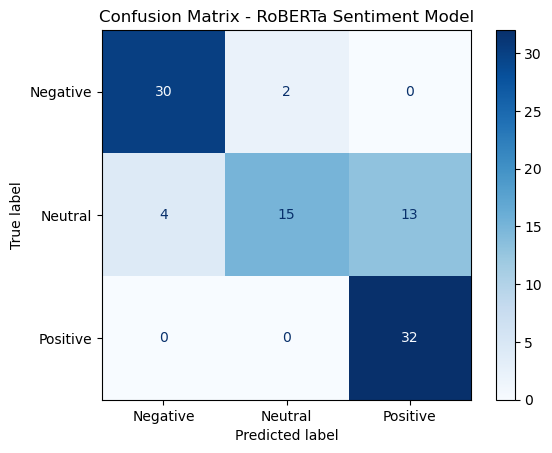

In [7]:
# Display Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels, labels=["LABEL_0", "LABEL_1", "LABEL_2"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Neutral", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - RoBERTa Sentiment Model")
plt.show()

In [8]:
# Enter text and get sentiment with probabilities.
label_map = {"LABEL_0": "Negative", "LABEL_1": "Neutral", "LABEL_2": "Positive"}

print("\nInteractive sentiment demo. Press Enter on an empty line or type 'q' to quit.")
try:
    while True:
        txt = input("\nEnter text: ").strip()
        if txt == "" or txt.lower() in {"q", "quit", "exit"}:
            break

        all_scores = sentiment_analyzer(txt, return_all_scores=True)[0]  # list of dicts
        top = max(all_scores, key=lambda d: d["score"])
        probs = {d["label"]: d["score"] for d in all_scores}

        print(f"Prediction: {label_map[top['label']]} ({top['label']})")
        print(
            "Probabilities: "
            f"Neg={probs.get('LABEL_0', 0):.3f}, "
            f"Neu={probs.get('LABEL_1', 0):.3f}, "
            f"Pos={probs.get('LABEL_2', 0):.3f}"
        )
except KeyboardInterrupt:
    print("\nExited.")


Interactive sentiment demo. Press Enter on an empty line or type 'q' to quit.


/opt/anaconda3/lib/python3.12/site-packages/transformers/pipelines/text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


Prediction: Positive (LABEL_2)
Probabilities: Neg=0.006, Neu=0.085, Pos=0.908
Prediction: Negative (LABEL_0)
Probabilities: Neg=0.893, Neu=0.089, Pos=0.018
Prediction: Positive (LABEL_2)
Probabilities: Neg=0.015, Neu=0.164, Pos=0.821
Prediction: Negative (LABEL_0)
Probabilities: Neg=0.650, Neu=0.305, Pos=0.045
Prediction: Positive (LABEL_2)
Probabilities: Neg=0.015, Neu=0.164, Pos=0.821
Prediction: Neutral (LABEL_1)
Probabilities: Neg=0.163, Neu=0.638, Pos=0.199
